# traer data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [1]:
#bring your data!
path = '../raw_data/twitter_reddit_text.csv'
data = pd.read_csv(f'{path}')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.dropna(inplace=True)
data.head()

NameError: name 'pd' is not defined

In [3]:
print('null values:\n \n',data.isnull().sum())


null values:
 
 clean_text    0
label         0
dtype: int64


## train test split


In [4]:
X = data.clean_text
y = data.label

X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.3 )


In [5]:
print('length of X_train',len(X_train), 'length of X_test',len(X_test), 'length of y_train',len(y_train), 'length of y_test',len(y_test))

length of X_train 17750 length of X_test 7608 length of y_train 17750 length of y_test 7608


In [6]:
X_train

6162     debat make post today told need share hope hel...
20866    snapesflow hey vote tomfelton current rd place...
10622    want wake even want sleep noth good ing alon d...
1658     canadiancollect thank greatli appreci must for...
14030    love shower super good food shame want e beyon...
                               ...                        
8780                                 jodi also uncool love
9121     sad weak even type word use social medium nobo...
6675     lost cat milo ago linger effect loss intens li...
3664                         new diet give way much energi
24742               jessicabowman alexvolk bing guy search
Name: clean_text, Length: 17750, dtype: object

## word tokenize and word 2 vec

In [7]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [8]:


X_train = [word_tokenize(str(_)) for _ in X_train]
X_test = [word_tokenize(str(_)) for _ in X_test]



In [9]:


# This line trains an entire embedding for the words in your train set
word2vec = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=5)

In [10]:
word2vec.wv['depress' , 'hello']

array([[-4.59850699e-01,  3.89713347e-01, -9.68490660e-01,
        -6.41987145e-01,  1.28261054e+00, -3.60262811e-01,
         9.83860552e-01,  1.01043236e+00, -2.77427614e-01,
         2.73515165e-01, -5.55068374e-01,  4.58507180e-01,
        -3.65594000e-01,  4.59521055e-01, -1.92613062e-02,
         7.04116672e-02,  8.15786645e-02,  6.47999883e-01,
         3.38834584e-01, -1.10254371e+00, -5.79744220e-01,
        -5.69661319e-01, -5.46255149e-02, -9.06901434e-02,
         4.24108356e-01, -4.55573767e-01,  2.40556095e-02,
         8.96067739e-01, -1.17223954e+00, -5.08016646e-01,
         7.11943030e-01,  3.70064139e-01,  6.30528688e-01,
        -1.24334025e+00,  9.94315743e-01, -5.36373615e-01,
         9.89882171e-01,  3.80771011e-01,  1.24880242e+00,
        -3.13426703e-01, -3.81974429e-01, -1.15600550e+00,
        -1.05382955e+00,  1.24725831e+00,  1.94187522e+00,
        -8.03649902e-01,  8.60523582e-01,  5.41347265e-01,
         5.97540736e-01, -1.40702695e-01,  1.19528675e+0

# data embedding

## embed data

In [11]:
def embed_sentence(word2vec, sentence):
    # $CHALLENGIFY_BEGIN
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.wv:
            embedded_sentence.append(word2vec.wv[word])
        
    return np.array(embedded_sentence)

In [12]:
def embedding(word2vec, sentences):
    # $CHALLENGIFY_BEGIN
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed
    # $CHALLENGIFY_END
    
X_train = embedding(word2vec, X_train)
X_test = embedding(word2vec, X_test)

## pad data

In [13]:
'''X_train_pad = pad_sequences(X_train, dtype='float', padding='post')
X_test_pad = pad_sequences(X_test, dtype='float', padding='post')'''

"X_train_pad = pad_sequences(X_train, dtype='float', padding='post')\nX_test_pad = pad_sequences(X_test, dtype='float', padding='post')"

In [14]:
print('number of train texts: ' ,len(X_train))
X_train[3].shape[0]

number of train texts:  17750


8

In [15]:
text_word_lengths = [X_train[i].shape[0] for i in np.arange(len(X_train))]
text_word_lengths_test = [X_test[i].shape[0] for i in np.arange(len(X_test))]

<AxesSubplot:title={'center':'test data lengths'}, ylabel='Count'>

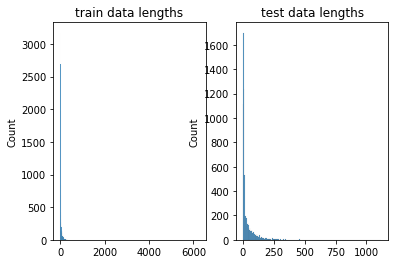

In [16]:
plt.figure()
plt.subplot(1,2,1)
plt.title('train data lengths')
sns.histplot(text_word_lengths)
plt.subplot(1,2,2)
plt.title('test data lengths')
sns.histplot(text_word_lengths_test)

In [17]:
text_word_lengths = np.array(text_word_lengths) 

In [18]:
text_word_lengths_df =pd.Series(text_word_lengths).sort_values()

In [19]:
text_word_lengths_df.sort_values(ascending=False).head(30)

10887    6240
3863     1193
15453    1044
11151    1012
12723     986
3977      844
774       825
17429     807
13596     803
7523      783
13270     725
12422     675
5617      658
16934     642
967       612
10079     612
13159     609
3159      606
14694     598
500       591
16311     590
14742     567
6869      565
8808      562
11374     548
15219     532
1042      529
14299     528
7787      512
2793      509
dtype: int64

In [20]:
#cortamos en 400 words

X_train_pad = pad_sequences(X_train, dtype='float', padding='post', maxlen= 400,truncating= 'post')
X_test_pad = pad_sequences(X_test, dtype='float', padding='post', maxlen = 400 , truncating = 'post')


# the model

## baseline score

In [21]:
from sklearn.metrics import accuracy_score

unique, counts = np.unique(y_train, return_counts=True)
counts = dict(zip(unique, counts))
print('Number of labels in train set', counts)

y_pred = 0 if counts[0] > counts[1] else 1

print('Baseline accuracy: ', accuracy_score(y_test, [y_pred]*len(y_test)))

Number of labels in train set {0: 8886, 1: 8864}
Baseline accuracy:  0.4985541535226078


## first neural network

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

def init_model():
    model = Sequential()
    model.add(layers.Masking())
    model.add(layers.LSTM(20, activation='tanh'))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy', 'AUC','Precision','Recall'])
    
    return model

model = init_model()

2022-03-09 13:36:05.400599: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-09 13:36:05.400646: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-09 13:36:05.400667: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-QMHRL2V): /proc/driver/nvidia/version does not exist
2022-03-09 13:36:05.400899: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=3, restore_best_weights=True)

history_fit = model.fit(X_train_pad, y_train, 
          batch_size = 32,
          epochs=100,
          validation_split=0.3,
          callbacks=[es],
          verbose = 1
         )

2022-03-09 13:37:06.938669: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1988000000 exceeds 10% of free system memory.


Epoch 1/100
389/389 [==============================] - ETA: 0s - loss: 0.1328 - accuracy: 0.9614 - auc: 0.9900 - precision: 0.9623 - recall: 0.9603

2022-03-09 13:39:06.032107: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 852000000 exceeds 10% of free system memory.


389/389 [==============================] - 117s 261ms/step - loss: 0.1328 - accuracy: 0.9614 - auc: 0.9900 - precision: 0.9623 - recall: 0.9603 - val_loss: 0.0694 - val_accuracy: 0.9777 - val_auc: 0.9966 - val_precision: 0.9711 - val_recall: 0.9846
Epoch 2/100
389/389 [==============================] - 97s 250ms/step - loss: 0.0591 - accuracy: 0.9803 - auc: 0.9961 - precision: 0.9861 - recall: 0.9742 - val_loss: 0.0639 - val_accuracy: 0.9795 - val_auc: 0.9960 - val_precision: 0.9946 - val_recall: 0.9644
Epoch 3/100
389/389 [==============================] - 96s 246ms/step - loss: 0.0533 - accuracy: 0.9833 - auc: 0.9969 - precision: 0.9879 - recall: 0.9784 - val_loss: 0.0547 - val_accuracy: 0.9816 - val_auc: 0.9968 - val_precision: 0.9920 - val_recall: 0.9711
Epoch 4/100
389/389 [==============================] - 98s 253ms/step - loss: 0.0498 - accuracy: 0.9839 - auc: 0.9974 - precision: 0.9888 - recall: 0.9789 - val_loss: 0.0504 - val_accuracy: 0.9825 - val_auc: 0.9972 - val_precision:

In [24]:
import joblib


In [26]:
joblib.dump(model, 'rnn_twitterreddit_2.sav')

INFO:tensorflow:Assets written to: ram://ca28a103-bce4-4988-8111-304896cb8bc2/assets


INFO:tensorflow:Assets written to: ram://ca28a103-bce4-4988-8111-304896cb8bc2/assets


['rnn_twitterreddit_2.sav']

TypeError: 'History' object is not callable